<div class="alert alert-block alert-info">
<b>

# Python for Data Science Bootcamp
## Lecture 16
    
## Textbook reference: Python Data Science Handbook 
## Chapter 3

Here are the topics for this lecture:

* Simple aggregation of Series and Dataframes, describe method
* Aggregation using Groupby with single, multiple column indexing
* Dispatch methods at group level
* Working with strings

Let's get started...
</b> 
</div>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Combining Datasets: Merge and Join](03.07-Merge-and-Join.ipynb) | [Contents](Index.ipynb) | [Pivot Tables](03.09-Pivot-Tables.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Aggregation and Grouping

**An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum()``, ``mean()``, ``median()``, ``min()``, and ``max()``, in which a single number gives insight into the nature of a potentially large dataset.**

In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a ``groupby``.

For convenience, we'll use the same ``display`` magic function that we've seen in previous sections:

In [16]:
# Our library imports
import numpy as np
import pandas as pd

# Special visualization function

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
**It gives information on planets that astronomers have discovered around other stars** (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [17]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape
# Data set has 1035 rows and 6 columns

(1035, 6)

In [18]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

Earlier, we explored some of the data aggregations available for NumPy arrays (["Aggregations: Min, Max, and Everything In Between"](02.04-Computation-on-arrays-aggregates.ipynb)).

## Aggregation with Series

As with a one-dimensional NumPy array, for a Pandas ``Series`` the aggregates return a single value:

In [19]:
# Let create a Series with random data (5 rows)
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum() # Sum of all values in series

2.811925491708157

In [6]:
ser.mean() # Mean of all values in series

0.5623850983416314

## Aggregating with Dataframes

For a ``DataFrame``, by default the aggregates return results within each column:

In [20]:
# Let's create a simple dataframe with two columns (A and B) 
# with 5 values each
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [22]:
# Now, remember that unlike Series, aggregations in Dataframes happen across rows by default. 
# So, if you simply apply a method to the dataframe each column is aggregated into one value
df.mean() 

A    0.477888
B    0.443420
dtype: float64

## You can change default behavior by using the ``axis`` argument

Thus, you can instead aggregate within each row:

In [23]:
# You can aggregate across columns (i.e. each row into single value)
# by specifying axis = "columns"
df.mean(axis='columns') 

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [69]:
# You can aggregate across columns (i.e. each row into single value)
# by specifying axis = 1
df.mean(axis=1) 

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

## Pandas ``Series`` and ``DataFrame``s include all of the common aggregates mentioned in chapter 2 section 4 [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb); 

## Additionally, there is a convenience method ``describe()`` **(like it!)** that computes several common aggregates for each column and returns the result.

Let's use this on the Planets data, also **dropping rows** with missing values:

In [24]:
planets.dropna().describe() # Calculate data descriptors (see rows)

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### This can be a useful way to begin understanding the overall properties of a dataset.

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

What if we want to go deeper into the data, simple aggregates are often not enough.

## To achieve, the next level of data summarization we will use the ``groupby`` operation

This operation allows us to quickly and efficiently compute aggregates on subsets of data.

## GroupBy: Split, Apply, Combine


**It allows you to aggregate conditionally on some label or index** 

The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

## Split, apply, combine

A canonical example of this split-apply-combine operation, where the "apply" is a summation aggregation, is illustrated in this figure:

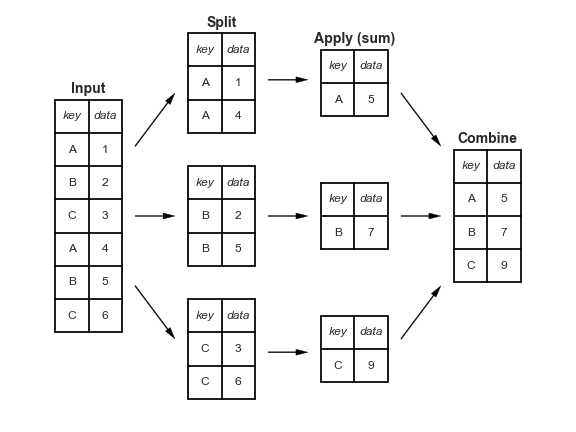

### The visual above illustrates what the ``groupby`` accomplishes:

### - The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
### - The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
### - The *combine* step merges the results of these operations into an output array.

The ``GroupBy`` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group along the way.

### The power of the ``GroupBy`` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather thinks about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram.

We'll start by creating the input ``DataFrame``:

In [25]:
# Creating a dataframe from a dictionary and specify column labels
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired **key column**:

In [26]:
df.groupby('key') # Aggregate by key value, but no output until....

Notice that what is returned is not a set of ``DataFrame``s, but a ``DataFrameGroupBy`` object.

This object is where the magic is: you can think of it as a special view of the ``DataFrame``, which is poised to dig into the groups but does no actual computation until the aggregation is applied.
This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

**To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:**

In [27]:
# Sum values of each group, when grouped by "key"
df.groupby('key').sum() 

,data
key,
A,3
B,5
C,7


In [13]:
# What if we want to know how many instances of data in the original dataframe when grouped 
# by "key"
# For example, two different values of A, 2 different values of B, two different values of C
df.groupby('key').count()

,data
key,
A,2
B,2
C,2


## The ``sum()`` and ``count()`` methods are just examples here; you can apply virtually any common Pandas or NumPy aggregation function, as well as virtually any valid ``DataFrame`` operation, as we will see in the following discussion.

### Column indexing: 

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [28]:
# Use "method" column as key to group data
planets.groupby('method') 

In [29]:
# Count instances for each column when grouping by "method"
# For example, 2 instances of "number" associated with "astrometry"
# and 0 instances for "mass"
planets.groupby('method').count() 

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [30]:
# When grouping by "method", how many times is the count of "year" 
# greater than 10
# First, we use groupby "method" and apply count method
# Second, we create a mask that checks if value in year column > 10
# Third, we sum through the "True" values to get single result
np.sum(planets.groupby('method')['year'].count()>10)

4

In [31]:
# Grouping by "method", show me the counts for orbital period
planets.groupby('method')['orbital_period'].count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           12
Microlensing                       7
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          3
Name: orbital_period, dtype: int64

In [32]:
# Grouping by "method", show me the counts for orbital period
planets.groupby('method').count()['orbital_period'] # Different order, same result

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           12
Microlensing                       7
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          3
Name: orbital_period, dtype: int64

### Here we've selected a particular ``Series`` group from the original ``DataFrame`` group by reference to its column name.
As with the ``GroupBy`` object, no computation is done until we call some aggregate on the object:

In [33]:
# Aggregate all types by method and orbital period
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [81]:
# Aggregate all types by method and orbital period
planets.groupby('method').median()['orbital_period']

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

## You can also group by multiple column indexing by providing a list of key values

In this case, you will get counts for unique combinations of
"method" and "orbital_period" values.  See below...

In [34]:
# Grouping by "method" AND "orbital period"
# Like having two keys
planets.groupby(['method','orbital_period']).count()

number  mass  distance  year
method                    orbital_period                              
Astrometry                246.36000            1     0         1     1
                          1016.00000           1     0         1     1
Eclipse Timing Variations 1916.25000           1     0         0     1
                          2883.50000           1     0         1     1
                          2900.00000           1     0         0     1
...                                          ...   ...       ...   ...
Transit                   303.13700            1     0         1     1
                          331.60059            1     0         1     1
Transit Timing Variations 22.33950             1     0         1     1
                          57.01100             1     0         1     1
                          160.00000            1     0         1     1

[988 rows x 4 columns]

In [35]:
# Grouping by "method" AND "orbital period" tell me how many times was count of column "year" > 1
np.sum(planets.groupby(['method','orbital_period']).count()['year']>1)

4

## Dispatch methods

### Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [37]:
# Grouping by method, describe statistics of "year" column
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [38]:
# Let us unstack so that descriptors become row indices (instead of columns)
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

### This is just one example of the utility of dispatch methods. Notice that they are applied **to each individual group**, and the results are then combined within ``GroupBy`` and returned. Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding ``GroupBy`` object, which allows for some very flexible and powerful operations!

## In summary, in this notebook we discussed:

* Simple aggregation of Series and Dataframes, describe method
* Aggregation using Groupby with single, multiple column indexing
* Dispatch methods at group level